In [24]:
import geopandas as gpd
import rasterio
import pandas as pd
import numpy as np
import contextily as cx
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
from rasterio import plot
import earthpy.spatial as es
from rasterio.plot import plotting_extent
import earthpy.plot as ep

model_directory = '../../../FloodModelling/{}Models/'.format(catchment_name)

def find_area (fp, landcover_type):
    
    with rasterio.open(model_directory + fp, 'r') as ds:
        array = ds.read()  # read all raster values
    
    values, counts = np.unique(array, return_counts=True)
    df=pd.DataFrame({'values':values,'WholeCatchment': counts})
    pc = round((df['WholeCatchment'][0]/(df['WholeCatchment'][0] + df['WholeCatchment'][1])) *100,1)
    print("{}% of the catchment (with a landcover class) is {}".format(pc, landcover_type))

In [25]:
if catchment_name == 'LinDyke':
    catchment_gdf = gpd.read_file(model_directory + 'Model_IdealisedProfiles/CatchmentLinDyke_exported.shp'.format(catchment_name))
elif catchment_name == 'WykeBeck':
    catchment_gdf = gpd.read_file(model_directory + 'Model_IdealisedProfiles/WykeBeckCatchment.shp'.format(catchment_name))

### Find area of catchment

In [26]:
print("{} catchment has an area of {}km2".format(catchment_name, round((catchment_gdf['geometry'].area /10**6)[0],2)))
find_area ('LandCoverData/LandCover_urban_classification.tif', 'Urban')   
find_area('LandCoverData/LandCover_urban_and_suburban_classification.tif', 'Urban (including suburban)')
find_area('LandCoverData/LandCover_water_classification.tif', 'Water')
find_area('LandCoverData/LandCover_notwater_classification.tif', 'not water')

LinDyke catchment has an area of 22.94km2


### Plot land cover data for both catchments side by side

In [53]:
def plot_land_cover(axs, fp, colors, labels, add_basemap = True, legend = True):
    # Read in data
    array = rasterio.open(model_directory + fp)
    # PLot catchment boundary
    catchment_gdf.plot(ax=axs, facecolor="none", linewidth=5, edgecolor = 'black')
    # Add openstreetmap basemap
    if add_basemap == True:
        cx.add_basemap(axs, crs = catchment_gdf.crs.to_string(), url = cx.providers.OpenStreetMap.Mapnik)
    # plot
    cmap = mpl.colors.ListedColormap(colors)
    cmap.set_bad('white')
    
    plot.show((array, 1), ax= axs, cmap =cmap)
    axs.axis('off')
    # Create legend
    if legend == True:
        patches_list = []
        for i, color in  enumerate(colors):
            patch =  mpatches.Patch(color=color, label=labels[i])
            patches_list.append(patch)  
        axs.legend(handles=patches_list, handleheight=3, handlelength=3, fontsize =10);

In [9]:
colors_dict = {'clipped': ['darkslategrey', 'khaki', 'darkturquoise','darkgreen','#59F74D', 'slateblue', 'lightgreen', 'palegreen', 'pink'],
              'urban':['darkslategrey','lightgreen'], 'water':['blue','darkslategrey']}
labels_dict = {'clipped': ['SubUrban', 'Arable', 'Freshwater', 'Deciduous woodland', 'Improved grassland', 'Urban', 'Neutral grassland', 'Calcareous grassland', 'Heather grassland'],
              'urban':['Urban','Not urban'], 'water':['Water','Not water']}

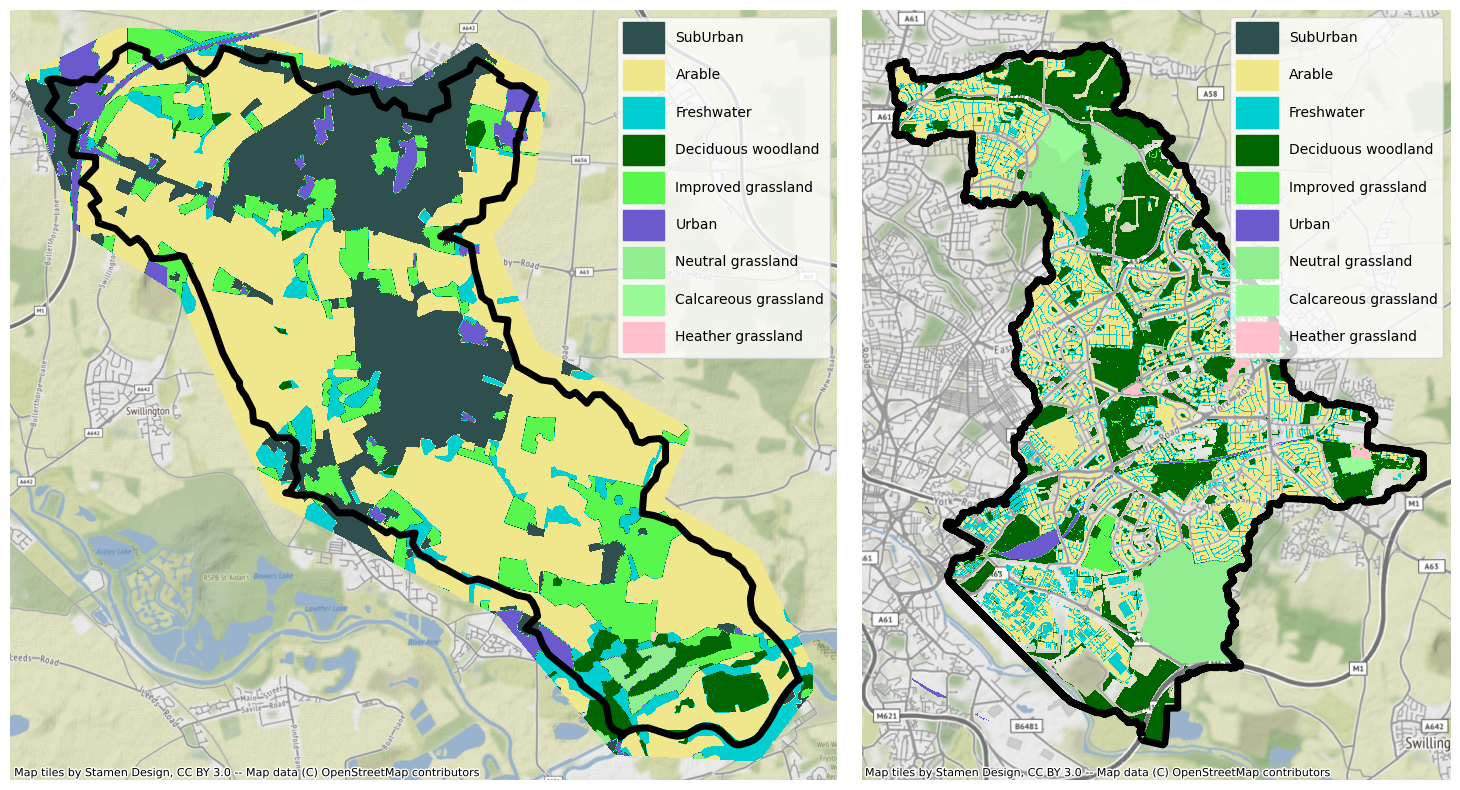

In [31]:
fig, axs = plt.subplots(ncols = 2, figsize=(24, 10), gridspec_kw={'wspace': -0.35})

def plot_land_cover(axs, fp, colors, labels):
    # Read in data
    array = rasterio.open(model_directory + fp)
    # PLot catchment boundary
    catchment_gdf.plot(ax=axs, facecolor="none", linewidth=5, edgecolor = 'black')
    # Add openstreetmap basemap
    cx.add_basemap(axs, crs = catchment_gdf.crs.to_string(), url = cx.providers.OpenStreetMap.Mapnik)
    # plot
    plot.show((array, 1), ax= axs, cmap =mpl.colors.ListedColormap(colors))
    axs.axis('off')
    # Create legend
    patches_list = []
    for i, color in  enumerate(colors):
        patch =  mpatches.Patch(color=color, label=labels[i])
        patches_list.append(patch)  
    axs.legend(handles=patches_list, handleheight=3, handlelength=3, fontsize =10);
    
catchment_name = 'LinDyke'
model_directory = '../../../FloodModelling/{}Models/'.format(catchment_name)
catchment_gdf = gpd.read_file(model_directory + 'Model_IdealisedProfiles/CatchmentLinDyke_exported.shp'.format(catchment_name))
plot_land_cover(axs[0], 'LandCoverData/LandCover_clipped.tif', colors_dict['clipped'], labels_dict['clipped']) 

catchment_name = 'WykeBeck'
model_directory = '../../../FloodModelling/{}Models/'.format(catchment_name)
catchment_gdf = gpd.read_file(model_directory + 'Model_IdealisedProfiles/WykeBeckCatchment.shp'.format(catchment_name))
plot_land_cover(axs[1], 'LandCoverData/LandCover_clipped.tif', colors_dict['clipped'], labels_dict['clipped'])   

### Plot topography - catchments side by side

### Plot topography

In [32]:
catchment_name  = 'LinDyke'
model_directory = '../../../FloodModelling/{}Models/'.format(catchment_name)
if catchment_name == 'LinDyke':
    catchment_gdf = gpd.read_file(model_directory + 'Model_IdealisedProfiles/CatchmentLinDyke_exported.shp'.format(catchment_name))
elif catchment_name == 'WykeBeck':
    catchment_gdf = gpd.read_file(model_directory + 'Model_IdealisedProfiles/WykeBeckCatchment.shp'.format(catchment_name))

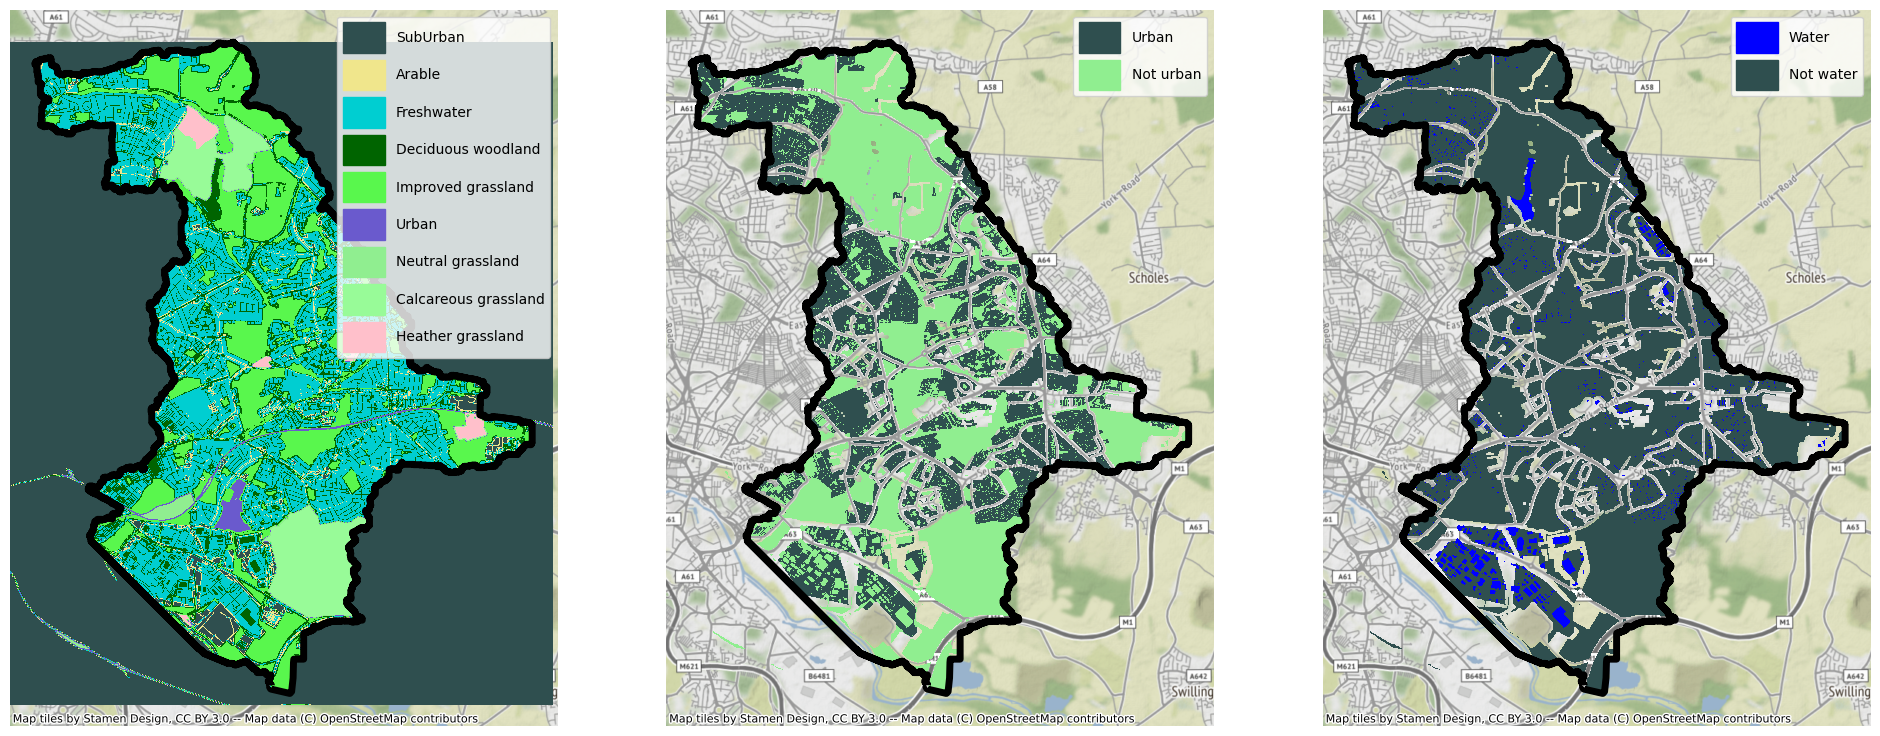

In [22]:
fig, axs = plt.subplots(ncols = 3, figsize=(24, 10))

def plot_land_cover(axs, fp, colors, labels):
    # Read in data
    array = rasterio.open(model_directory + fp)
    # PLot catchment boundary
    catchment_gdf.plot(ax=axs, facecolor="none", linewidth=5, edgecolor = 'black')
    # Add openstreetmap basemap
    cx.add_basemap(axs, crs = catchment_gdf.crs.to_string(), url = cx.providers.OpenStreetMap.Mapnik)
    # plot
    plot.show((array, 1), ax= axs, cmap =mpl.colors.ListedColormap(colors))
    axs.axis('off')
    # Create legend
    patches_list = []
    for i, color in  enumerate(colors):
        patch =  mpatches.Patch(color=color, label=labels[i])
        patches_list.append(patch)  
    axs.legend(handles=patches_list, handleheight=3, handlelength=3, fontsize =10);

plot_land_cover(axs[0], 'LandCoverData/LandCover_clipped.tif', colors_dict['clipped'], labels_dict['clipped'])    
plot_land_cover(axs[1], 'LandCoverData/LandCover_urban_classification.tif', colors_dict['urban'], labels_dict['urban'])  
plot_land_cover(axs[2], 'LandCoverData/LandCover_water_classification.tif', colors_dict['water'], labels_dict['water'])    

In [13]:
watercourses = gpd.read_file('../../../FloodModelling/ExtraData/Watercourses/WatercourseLink.shp')

In [46]:
def plot_land_cover(axs, catchment_gdf, fp, colors, labels):
    # Read in data
    array = rasterio.open(fp)
    # PLot catchment boundary
    catchment_gdf.plot(ax=axs, facecolor="none", linewidth=5, edgecolor = 'black')
    # Add openstreetmap basemap
    cx.add_basemap(axs, crs = catchment_gdf.crs.to_string(), url = cx.providers.OpenStreetMap.Mapnik)
    # plot
    plot.show((array, 1), ax= axs, cmap =mpl.colors.ListedColormap(colors))
    axs.axis('off')
    # Create legend
    patches_list = []
    for i, color in  enumerate(colors):
        patch =  mpatches.Patch(color=color, label=labels[i])
        patches_list.append(patch)  
    #axs.legend(handles=patches_list, handleheight=3, handlelength=3, fontsize =10);

### Plot catchment landcover side by side

In [33]:
colors_dict_ld = {'clipped': ['darkslategrey', 'khaki', 'darkturquoise','darkgreen','mediumseagreen', 'thistle', 'lightgreen', 'palegreen', 'pink'],
              'urban':['darkslategrey','lightgreen'], 'water':['blue','darkslategrey']}
labels_dict_ld = {'clipped': ['SubUrban', 'Arable', 'Freshwater', 'Deciduous woodland', 'Improved grassland', 'Urban', 'Neutral grassland', 'Calcareous grassland', 'Heather grassland'],
              'urban':['Urban','Not urban'], 'water':['Water','Not water']}

colors_dict_wb = {'clipped': ['khaki', 'thistle', 'darkturquoise','darkgreen','darkslategrey', 'mediumseagreen', 'lightgreen', 'palegreen', 'pink'],
              'urban':['darkslategrey','lightgreen'], 'water':['blue','darkslategrey']}
labels_dict_wb = {'clipped': ['Arable', 'Urban', 'Freshwater', 'Deciduous woodland', 'Suburban', 'Improved Grassland', 'Neutral grassland', 'Calcareous grassland', 'Heather grassland'],
              'urban':['Urban','Not urban'], 'water':['Water','Not water']}

In [53]:
def plot_land_cover(axs, fp, colors, labels, add_basemap = True, legend = True):
    # Read in data
    array = rasterio.open(model_directory + fp)
    # PLot catchment boundary
    catchment_gdf.plot(ax=axs, facecolor="none", linewidth=5, edgecolor = 'black')
    # Add openstreetmap basemap
    if add_basemap == True:
        cx.add_basemap(axs, crs = catchment_gdf.crs.to_string(), url = cx.providers.OpenStreetMap.Mapnik)
    # plot
    cmap = mpl.colors.ListedColormap(colors)
    cmap.set_bad('white')
    
    plot.show((array, 1), ax= axs, cmap =cmap)
    axs.axis('off')
    # Create legend
    if legend == True:
        patches_list = []
        for i, color in  enumerate(colors):
            patch =  mpatches.Patch(color=color, label=labels[i])
            patches_list.append(patch)  
        axs.legend(handles=patches_list, handleheight=3, handlelength=3, fontsize =10);

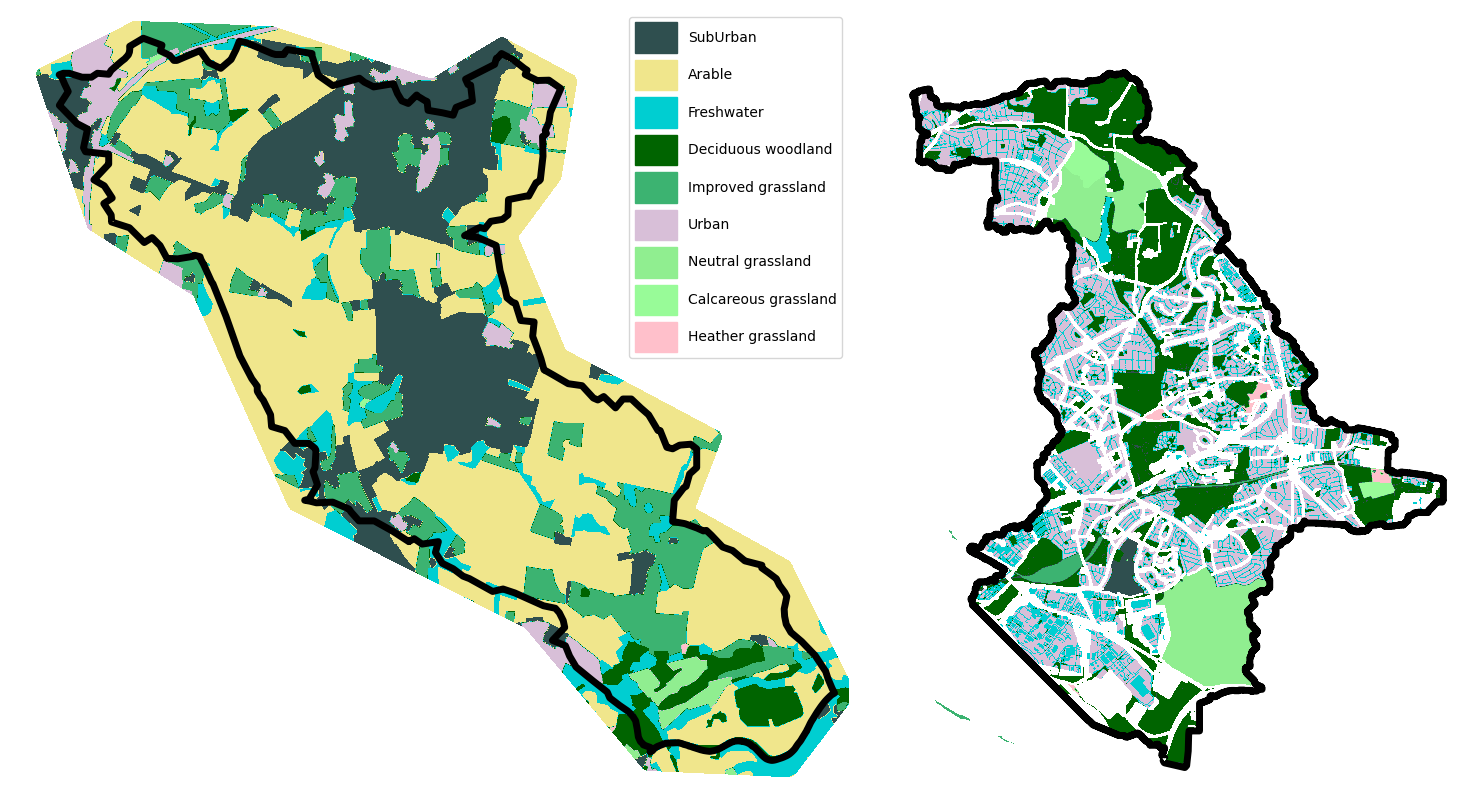

In [54]:
fig, axs = plt.subplots(ncols = 2, figsize=(24, 10), gridspec_kw={'wspace': -0.35})

catchment_name = 'LinDyke'
model_directory = '../../../FloodModelling/{}Models/'.format(catchment_name)
catchment_gdf = gpd.read_file(model_directory + 'Model_IdealisedProfiles/CatchmentLinDyke_exported.shp'.format(catchment_name))
plot_land_cover(axs[0], 'LandCoverData/LandCover_clipped.tif', colors_dict_ld['clipped'], labels_dict_ld['clipped'], False) 

catchment_name = 'WykeBeck'
model_directory = '../../../FloodModelling/{}Models/'.format(catchment_name)
catchment_gdf = gpd.read_file(model_directory + 'Model_IdealisedProfiles/WykeBeckCatchment.shp'.format(catchment_name))
plot_land_cover(axs[1], 'LandCoverData/LandCover_clipped.tif', colors_dict_wb['clipped'], labels_dict_wb['clipped'], False, False) 

fig.savefig("../FigsForPaper/LandCover_BothCatchments.jpg",  bbox_inches='tight')

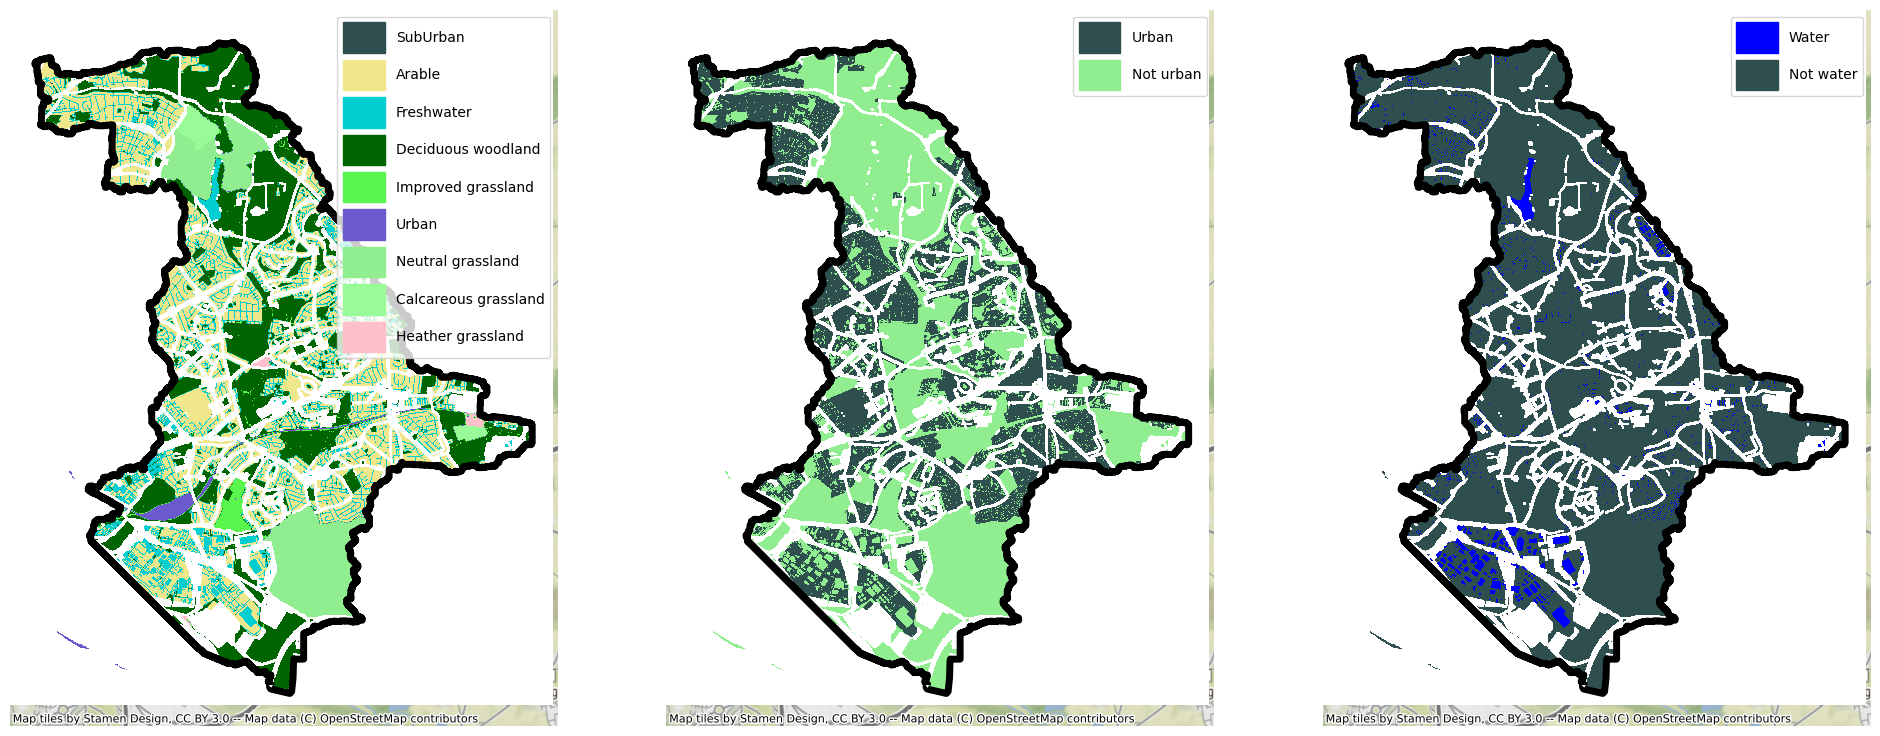

In [51]:
if catchment_name == 'LinDyke':
    catchment_gdf = gpd.read_file(model_directory + 'Model_IdealisedProfiles/CatchmentLinDyke_exported.shp'.format(catchment_name))
elif catchment_name == 'WykeBeck':
    catchment_gdf = gpd.read_file(model_directory + 'Model_IdealisedProfiles/WykeBeckCatchment.shp'.format(catchment_name))


fig, axs = plt.subplots(ncols = 3, figsize=(24, 10))

plot_land_cover(axs[0], 'LandCoverData/LandCover_clipped.tif', colors_dict['clipped'], labels_dict['clipped'])    
plot_land_cover(axs[1], 'LandCoverData/LandCover_urban_classification.tif', colors_dict['urban'], labels_dict['urban'])  
plot_land_cover(axs[2], 'LandCoverData/LandCover_water_classification.tif', colors_dict['water'], labels_dict['water'])    